hello


In [27]:
from HMM import load_HMM
from dictionaries import id_to_word, rhyming_dictionary, word_to_id, syllable_dictionary
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import animation
from matplotlib.animation import FuncAnimation

In [30]:

####################
# WORDCLOUD FUNCTIONS
####################

def mask():
    # Parameters.
    r = 128
    d = 2 * r + 1

    # Get points in a circle.
    y, x = np.ogrid[-r:d-r, -r:d-r]
    circle = (x**2 + y**2 <= r**2)

    # Create mask.
    mask = 255 * np.ones((d, d), dtype=np.uint8)
    mask[circle] = 0

    return mask

def text_to_wordcloud(text, max_words=50, title='', show=True):
    plt.close('all')

    # Generate a wordcloud image.
    wordcloud = WordCloud(random_state=0,
                          max_words=max_words,
                          background_color='white',
                          mask=mask()).generate(text)
    print(wordcloud)
    # Show the image.
    if show:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=24)
        plt.show()

    return wordcloud

def states_to_wordclouds(hmm, obs_map, max_words=50, show=True):
    # Initialize.
    M = 100000
    n_states = len(hmm.A)
    obs_map_r = hmm.obs_map_reverser(obs_map)
    wordclouds = []

    # Generate a large emission.
    emission, states = hmm.generate_emission(M)

    # For each state, get a list of observations that have been emitted
    # from that state.
    obs_count = []
    for i in range(n_states):
        obs_lst = np.array(emission)[np.where(np.array(states) == i)[0]]
        obs_count.append(obs_lst)

    # For each state, convert it into a wordcloud.
    for i in range(n_states):
        obs_lst = obs_count[i]
        sentence = [obs_map_r[j] for j in obs_lst]
        sentence_str = ' '.join(sentence)

        wordclouds.append(text_to_wordcloud(sentence_str, max_words=max_words, title='State %d' % i, show=show))

    return wordclouds

In [8]:
####################
# HMM VISUALIZATION FUNCTIONS
####################

def visualize_sparsities(hmm, O_max_cols=50, O_vmax=0.1):
    plt.close('all')
    plt.set_cmap('viridis')

    # Visualize sparsity of A.
    plt.imshow(hmm.A, vmax=1.0)
    plt.colorbar()
    plt.title('Sparsity of A matrix')
    plt.show()

    # Visualize parsity of O.
    plt.imshow(np.array(hmm.O)[:, :O_max_cols], vmax=O_vmax, aspect='auto')
    plt.colorbar()
    plt.title('Sparsity of O matrix')
    plt.show()


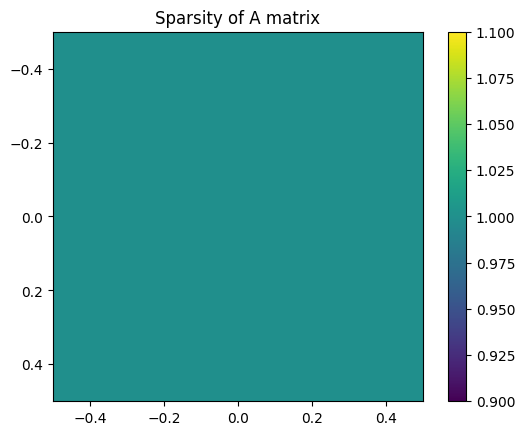

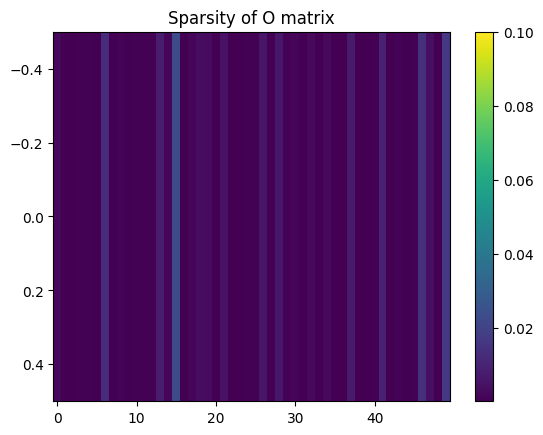

In [11]:
visualize_sparsities(load_HMM("models/hmm-1-1.txt"))

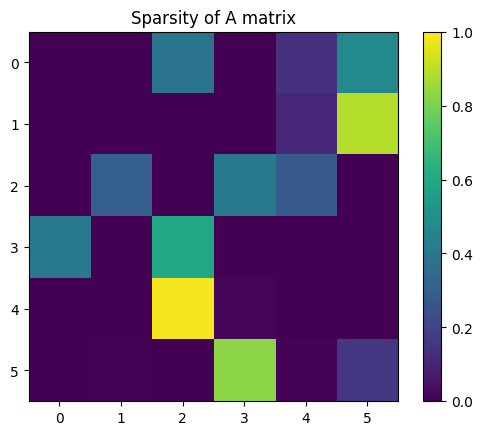

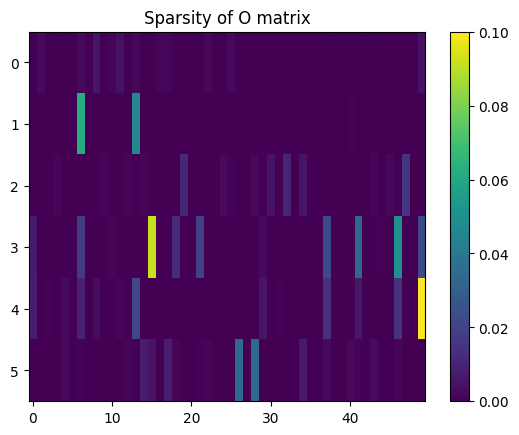

In [17]:
hmm_6_100 = load_HMM("models/hmm-6-100.txt")
visualize_sparsities(hmm_6_100)

In [ ]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

In [25]:


# helpers
def prefix_word(word):
    if word in syllable_dictionary:
        counts = syllable_dictionary[word]
    else:
        for punct in [",", ".", "!", "?", ":", "'", ";", "(", ")", "[", "]", "{", "}"]:
            word = word.replace(punct, "")
            if word in syllable_dictionary:
                break
        counts = syllable_dictionary[word]

    end_counts = [c for c in counts if c[0] == "E"]
    count = end_counts[0] if len(end_counts) > 0 else counts[0]

    stress = "/"
    prefix = ""
    for _ in range(int(count.replace("E", ""))):
        prefix = stress + prefix
        stress = "/" if stress == "$" else "$"

    return prefix + word


def print_emission(emission, remove_special=False):
    if remove_special:
        print(
            " ".join(
                [id_to_word[id].replace("$", "").replace("/", "") for id in emission]
            )
        )
    else:
        print(" ".join([id_to_word[id] for id in emission]))


def invert_words(words):
    return [
        word_to_id[prefix_word(word)]
        for word in words
        if prefix_word(word) in word_to_id
    ]

In [28]:
text = ""
for _ in range(1000):
    emission, _ = hmm_6_100.generate_emission(10, end_words=invert_words(rhyming_dictionary.keys()))
    text += " ".join([id_to_word[id] for id in emission])
text



"$a /$waning /those $to $me /steal $i /look /done/shall /$being /found $taught /that $the /$carry /bar/tied /$sometimes $time's /$ever /thought $/disdains /bold$may /thee $by /$goodness /my $there /cast $/forsaken$let /eye $/appear $might /may $and $black /hate /fashion$thine /age $one /$having $from /$beauty $/anew/thy $could /$beauty /foe $masked /be /$general /break/$little $/wooing /should $a /art $the /seek /hour$but /they $time's /glass $me /life $time's /$water /ranged/loving /book $by /jacks $the /$partly /$/subtleties$seem /live $/$eternal /foes /make /$/counterfeit/pain $large $fair /$subject $on /days $when $of /sun$not /those /$shadows $doth /$image /i $to /friend$they /runs /in $/assemble /$single $to $/amen$wide /too $/$remembered /take $which /land $old /matter/in $not /$perfect /are $/$directly $/untold/with $his /spirit $not /$being $have /$/remedy/would $these /friend $it /$absence $but /loved $or /skill$you /heart $fool /$eager $i /not th' $five $my /give$if /sap $or

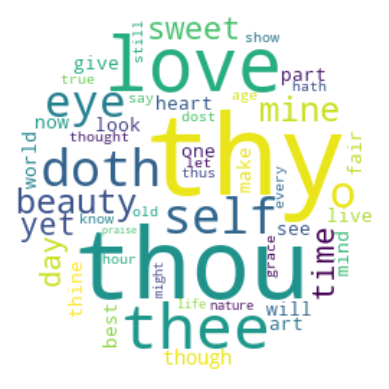

In [31]:
text_to_wordcloud(text)